## Geometric Image Transformations:
The functions in this section perform various geometrical transformations of 2D images. They do not change the image content but deform the pixel grid and map this deformed grid to the destination image.


Two important methods for Image transformation for both external and internal pixel representation,                  
* **Extrapolation of non-existing pixels:**                            
  Similarly to the filtering functions,both of the horizontal and vertical pixels may fall outside of the image. Border methods are used for extrapolation.
* **Interpolation of pixel values:**                                         
  This method is usually gives floating-point numbers. This can be either an affine or perspective transformation, or radial lens distortion correction, and so on. So, a pixel value at fractional coordinates needs to be retrieved. In the simplest case, the coordinates can be just rounded to the nearest integer coordinates and the corresponding pixel can be used. This is called a nearest-neighbor interpolation.There are many interpolation methods available in OpenCV like bilinear, bicubic etc.
  
Link : https://opencv24-python-tutorials.readthedocs.io/en/stable/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html        

## Interpolation:
Links:            
Nearest Neighbor and Bilinear - https://www.youtube.com/watch?v=AqscP7rc8_M                                   
                                       https://www.youtube.com/watch?v=8bTDssnJyZc                                    
       Bicubic interpolation - https://www.youtube.com/watch?v=poY_nGzEEWM                                            
       
### **1.Nearest Neighbor:**    
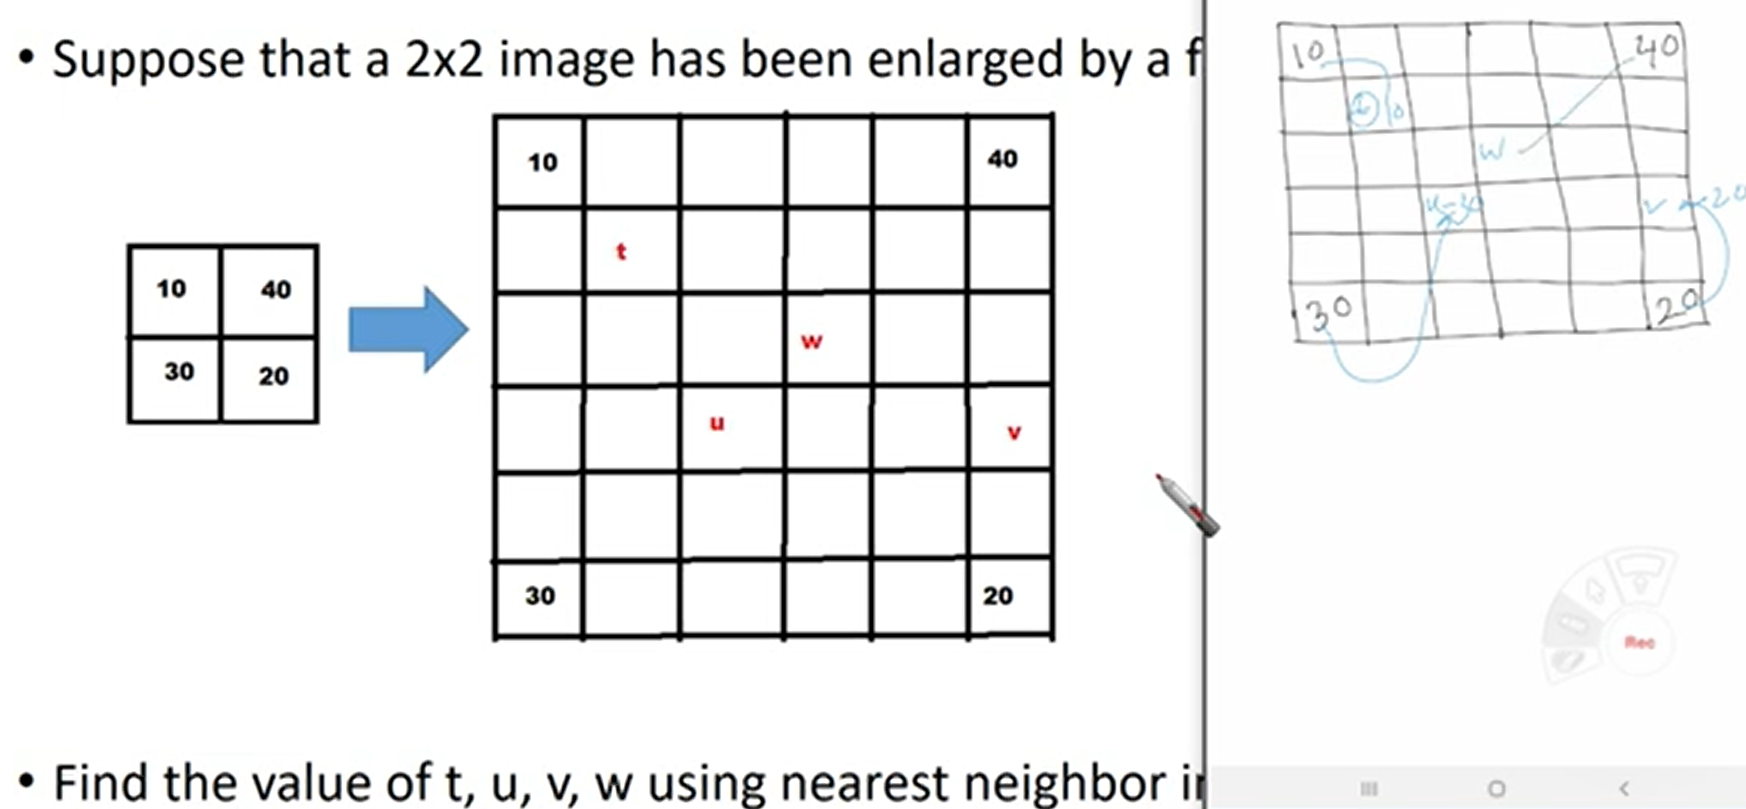

### 2. Bilinear Interpolation:
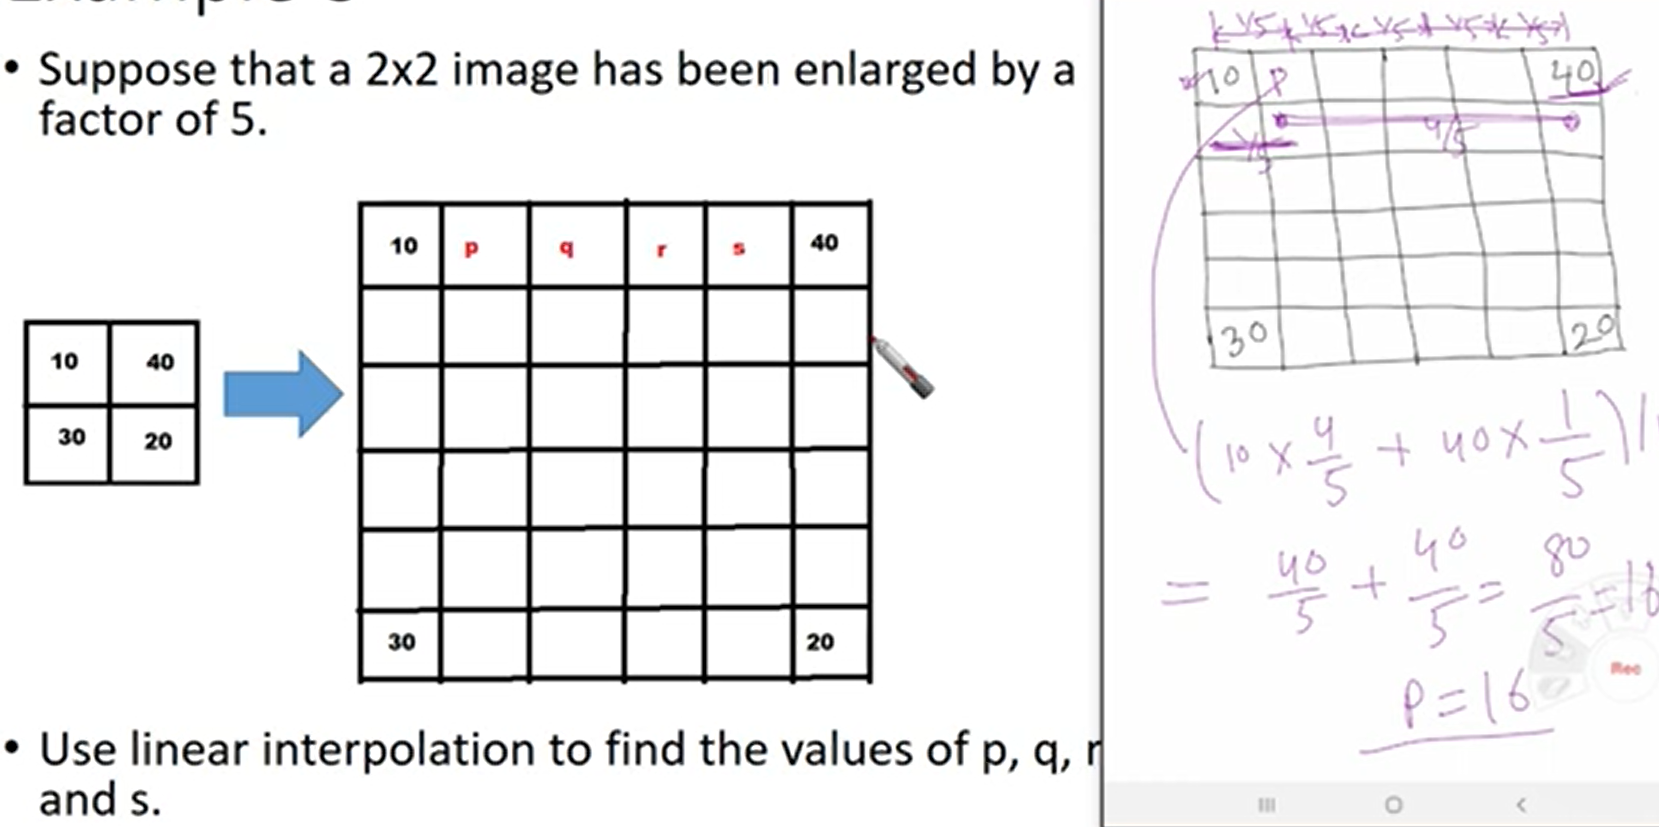

### Operations in OpenCV:

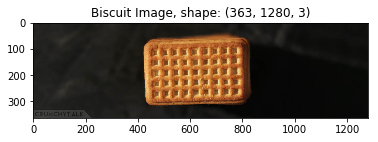

In [65]:
# importing library and reading an image
import cv2
import matplotlib.pyplot as plt
import numpy as np

# reading 
image_bgr = cv2.imread("./data/biscuit.jpg")

# converting to rgb
image_rgb= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

#ploting
plt.title("Biscuit Image, shape: {}".format(image_rgb.shape))
plt.imshow(image_rgb)
plt.show()

### 1. resize/Scale:

The function resize resizes the image src down to or up to the specified size.To **shrink an image, it will generally look best with INTER_AREA interpolation**, whereas to **enlarge an image, it will generally look best with c::INTER_CUBIC (slow) or INTER_LINEAR (faster but still looks OK).**             

parameters:         
**dsize:** size to resize the image         
**interpolation:** to interpolate or to set a weighted sum of nearest pixels inbetween. Default: cv2.INTER_LINEAR

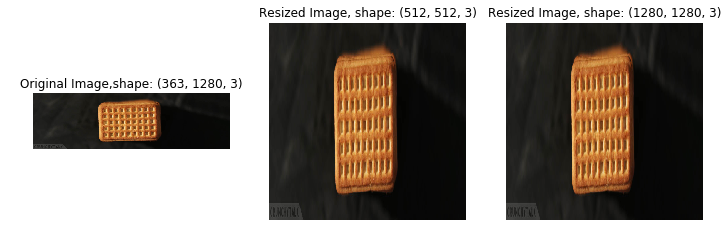

In [66]:
# import livrary
import cv2
import matplotlib.pyplot as plt

biscuit_bgr= cv2.imread("./data/biscuit.jpg")

biscuit_rgb= cv2.cvtColor(biscuit_bgr, cv2.COLOR_BGR2RGB)

# resizing the image to 512x512
## To shrink an image, it will generally look best with INTER_AREA interpolation,
resized_512= cv2.resize(src= biscuit_rgb, dsize= (512,512), interpolation= cv2.INTER_AREA)

# resizing the image to 1280x1280
## to enlarge an image, it will generally look best with c::INTER_CUBIC (slow) or INTER_LINEAR (faster but still looks OK).
resized_1280= cv2.resize(src= biscuit_rgb, dsize= (1280,1280), interpolation= cv2.INTER_LINEAR)


# plotting the image
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,3,1)
ax1.set_title("Original Image,shape: {}".format(biscuit_rgb.shape))
ax1.axis("off")
ax1.imshow(biscuit_rgb)

ax2 = fig.add_subplot(1,3,2)
ax2.set_title("Resized Image, shape: {}".format(resized_512.shape))
ax2.axis("off")
ax2.imshow(resized_512)


ax2 = fig.add_subplot(1,3,3)
ax2.set_title("Resized Image, shape: {}".format(resized_1280.shape))
ax2.axis("off")
ax2.imshow(resized_1280)
plt.show()


#### Scaling the image using Affine Transform:

In [67]:
# scaling matrix to give input to warpAffine
scale_x= 0.2
scale_y= 0.8
scale_matrix= np.array([[scale_x, 0 ,0],
                        [0, scale_y, 0]])

# using cv2.warpAffine
scale_affine= cv2.warpAffine(src= biscuit_rgb, M= scale_matrix, dsize= (biscuit_rgb.shape[1], biscuit_rgb.shape[0]))

plt.title("Rotation using cv2.warpAffine")
plt.imshow(scale_affine)
plt.show()

### 2. Image Rotation:
Rotation of an image for an angle \theta is achieved by the transformation matrix of the form
               


#### getRotationMatrix2D:            
Function returns the transformation matrix M, by providing center axis, angle to rotate and the scaling factor


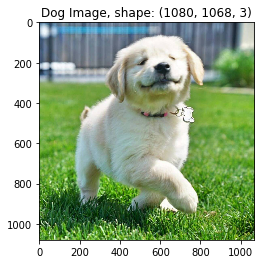

In [73]:
# import library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# reading an image
dog_bgr= cv2.imread("./data/dog.png")

# convert to rgb
dog_rgb= cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2RGB)

# ploting the image
plt.title("Dog Image, shape: {}".format(dog_rgb.shape))
plt.imshow(dog_rgb)
plt.show()

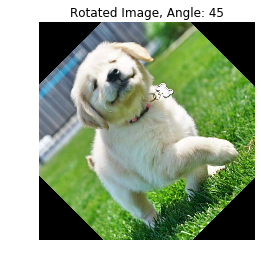

In [79]:
# rotating an image by first getting the translation matrix using cv2.getRotationMatrix
angle= 45
rot_matrix= cv2.getRotationMatrix2D(center= (dog_rgb.shape[1]//2, dog_rgb.shape[0]//2), angle= angle, scale= 1)

# rotated image using cv2.warpAffine
rot_image= cv2.warpAffine(src= dog_rgb, M= rot_matrix, dsize= (dog_rgb.shape[1], dog_rgb.shape[0]), flags= cv2.INTER_AREA,borderMode= cv2.BORDER_CONSTANT)

plt.title("Rotated Image, Angle: {}".format(angle))
plt.imshow(rot_image)
plt.axis("off")
plt.show()

#### Rotation by using Affine Transform:

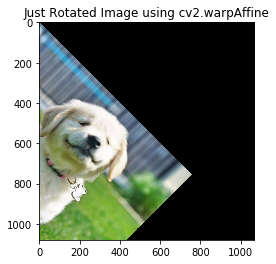

In [89]:
# rotation matrix

angle= 45
theta= angle * (np.pi/180)
w,h= dog_rgb.shape[:2]

rotate_matrix= np.array([[np.cos(theta), -np.sin(theta), 0],
                         [np.sin(theta), np.cos(theta),  0]])

# using cv2.waepAffine
rotate_image= cv2.warpAffine(src= dog_rgb, M= rotate_matrix, dsize= (dog_rgb.shape[1], dog_rgb.shape[0]))

# plotting
plt.title("Just Rotated Image using cv2.warpAffine")
plt.imshow(rotate_image)
plt.show()

### 3. Image Translation:


#### Affine Transformation:    
An affine transformation is a geometric transformation that preserves points, straight lines, and planes. Lines that are parallel before the transform remain parallel post-application of the transform. For every pixel x in an image, the affine transformation can be represented by the mapping, x |→ Mx+b, where M is a linear transform (matrix) and b is an offset vector.

The affine transformation technique is typically used to correct for geometric distortions or deformations that occur with non-ideal camera angles. For example, satellite imagery uses affine transformations to correct for wide angle lens distortion, panorama stitching, and image registration.

**Link:**
https://subscription.packtpub.com/book/data/9781789537147/1/ch01lvl1sec04/applying-affine-transformation

#### warpAffine:    
warpAffine function is used for Scaling, flipping, image translation and image rotation. The parameters can be taken from **getAffineTransform** method.                               

**Image Translation: (shifting)**
warAffine used for shifting an image.This is to move the image within our frame of reference.

**Translation Matrix:** to control the shifting along x or y axis
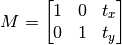
 tx and ty could control the shift pixels on x and y direction respectively.the image will be moved by X units towards the right (if tx is positive), and by Y units downwards (if ty is positive). Else , it shifts in the opposite way.


parameters:       
**M**             - 2x3 translation matrix                        
**dsize**         - size of the output image.                                   
**flags**         -	combination of interpolation methods and the optional flag WARP_INVERSE_MAP that means that M is the                           inverse transformation ( dst→src ).                             
**borderMode**    -	pixel extrapolation method. default: cv2.BORDER_CONSTANT                                       
**borderValue**   - value used in case of a constant border; by default, it is 0.                            

Link: https://stackoverflow.com/questions/19068085/shift-image-content-with-opencv

In [37]:
# importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# reading an image
dog_bgr= cv2.imread("./data/dog.png")

# converting to rgb
dog_rgb= cv2.cvtColor(dog_bgr, cv2.COLOR_BGR2RGB)


# cv2.warAffine for shifting the image 

# translating right and down by 50 pixels using positive values in tx and ty 
translate_right= np.float32([[1, 0, 50], [0, 1, 0]])
translate_down= np.float32([[1, 0, 0], [0, 1, 50]])

# translating left and upwards by 100 pixels using negative values in tx and ty
translate_left= np.float32([[1, 0, -100], [0, 1, 0]])
translate_up= np.float32([[1, 0, 0], [0, 1, -100]])


shifted_right_img= cv2.warpAffine(src= dog_rgb, M= translate_right, dsize= dog_rgb.shape[:2])
shifted_left_img= cv2.warpAffine(src= dog_rgb, M= translate_left, dsize= dog_rgb.shape[:2])
shifted_down_img= cv2.warpAffine(src= dog_rgb, M= translate_down, dsize= dog_rgb.shape[:2])
shifted_up_img= cv2.warpAffine(src= dog_rgb, M= translate_up, dsize= dog_rgb.shape[:2])

images_to_plot= [(dog_rgb,'original,shape: {}'.format(dog_rgb.shape)), (shifted_right_img, "Right shift:50 pixels"), (shifted_left_img, "Left Shift: 100 pixels"),
                 (shifted_down_img,"Down Shift: 50 pixels"), (shifted_up_img, "Up shift: 100 pixels")]
# plotting the image
def main():
    n = 5
    max_width = 2 ##images per row
    height, width = n//max_width +1, max_width
    fig, axs = plt.subplots(height, width, sharex=True,figsize= (12,12))

    for i in range(n):
        ax = axs.flat[i]
        ax.imshow(images_to_plot[i][0])
        ax.set_title(images_to_plot[i][1])
        ax.axis("off")
        
    ## access each axes object via axs.flat
    for ax in axs.flat:
        ## check if something was plotted 
        if not bool(ax.has_data()):
            fig.delaxes(ax) ## delete if nothing is plotted in the axes obj

    fig.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


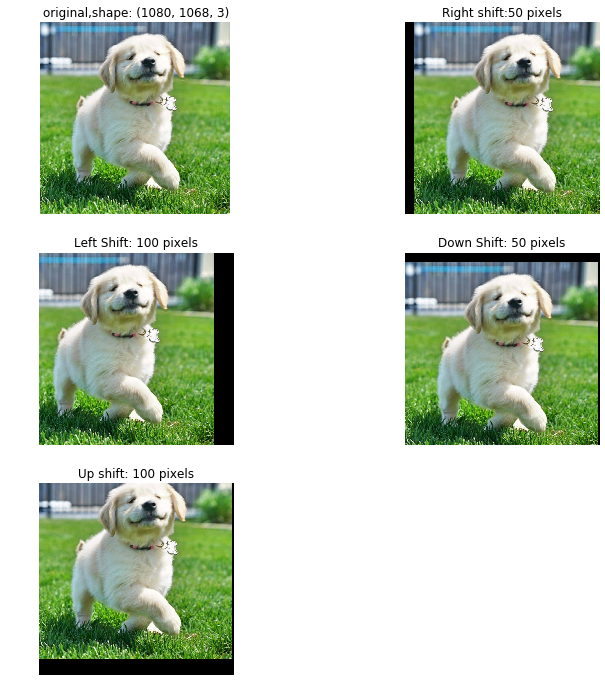

In [38]:
main()

### 4. Perspective Transform:
In Perspective Transformation, we can change the perspective of a given image or video for getting better insights about the required information.

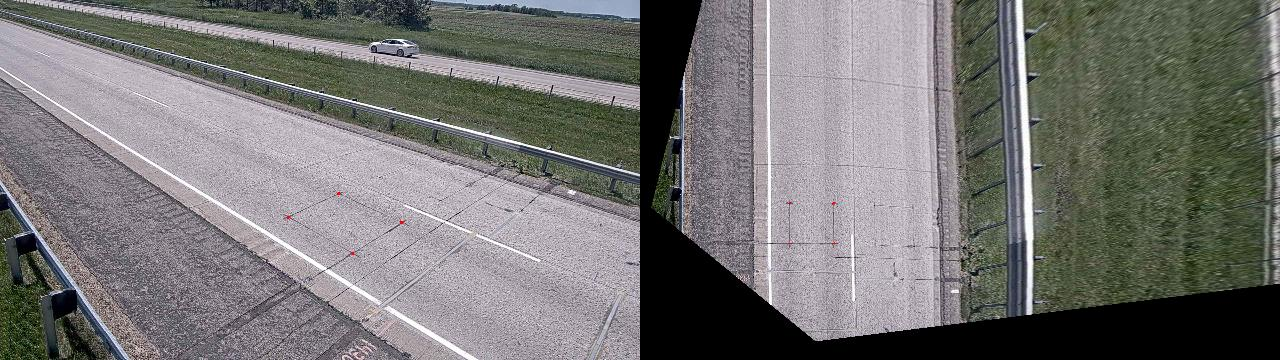

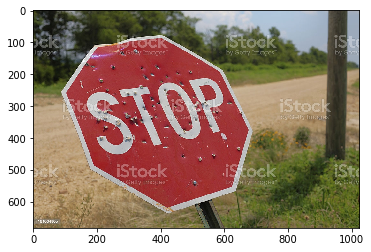

In [2]:
# importing libraries
import cv2
import matplotlib.pyplot as plt
#%matplotlib qt

import numpy as np

# reading an image
image_bgr= cv2.imread("./data/stop_sign.jpg")

# convertin to rgb and grayscale
image_rgb= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# plotting the image
# plt.title("Image, shape: {}".format(image_rgb.shape))
# plt.imshow(image_rgb)
# plt.show()

plt.imshow(image_rgb)
plt.show()

In [5]:
# perspective transform : 
# first have to set a coordinates as [top_left, top_right, bottom_right, bottom_left]

def get_points(points):
    
    # initializing the coordinates
    rect= np.zeros(shape= (4,2), dtype= np.float32)
    
    #the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    sum_points= points.sum(axis= 1) # sum of each coordinates
    
    #top left
    rect[0]= points[np.argmin(sum_points)]
    #bottom right
    rect[2]= points[np.argmax(sum_points)]
    
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff_points= np.diff(points,axis=1)
    
    # top right
    rect[1]= points[np.argmin(diff_points)]

    # bottom left
    rect[3]= points[np.argmax(diff_points)]
    
    return rect

def perspective_trans(image, points):
    
    # ordering the points
    rect=  get_points(points)
    (tl, tr, br, bl) = rect
    
    # getting maximum wiidth by finding distance between br, bl and tr,tl 
    width_b= np.sqrt((bl[1] - br[1])**2 + (bl[0] - br[0])**2)
    width_t= np.sqrt((tl[1] - tr[1])**2 + (tl[0] - tr[0])**2)
    
    maxWidth= max(width_b,width_t)
    
    # getting maximum height by finding distance between tl,bl and tr,br
    height_l= np.sqrt((bl[1] - tl[1])**2 + (bl[0] - tl[0])**2)
    height_r= np.sqrt((br[1] - tr[1])**2 + (br[0] - tr[0])**2)
    
    maxHeight= max(height_r, height_l)
    
    # now that we have the dimensions of the new image, construct the set of destination points to obtain a "birds eye view", (i.e. top-down view) of the image
    # order: [tl, tr,br,bl]
    dst= np.array([[0, 0],
                  [maxWidth-1, 0],
                  [maxWidth-1, maxHeight-1],
                  [0, maxHeight-1]], dtype= np.float32)
    
    # getting perspective transform matrix
    persp_matrix= cv2.getPerspectiveTransform(rect, dst)
    
    img_warped= cv2.warpPerspective(src= image,M= persp_matrix, dsize= (image.shape[1], image.shape[0]))
    return img_warped

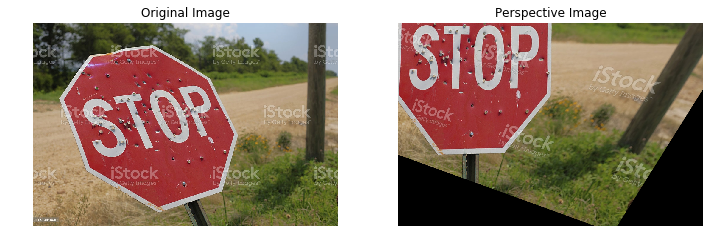

In [6]:
# getting perspective image
pts= np.array([(90,263), (187,486), (678,377),(586,196)])
corrected_img= perspective_trans(image_rgb, pts)

# plotting
fig = plt.figure(figsize = (12,12))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(image_rgb)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Perspective Image")
ax2.axis("off")
ax2.imshow(corrected_img)
plt.show()